<h1 style = "color: black; background-color:#FFC125;padding:1%; border-radius:15px; text-align:left;font-family:Times New Roman;font-size:42px;"> New York City Taxi <h1>

<img src="https://avatars.mds.yandex.net/i?id=29a4d3246655b9c6f7114de0a1b9287a_l-4569110-images-thumbs&n=13" alt="Образец изображения" width="1000" height ="600">


## <h2 style="font-size:35px;color:#EE3B3B;">Library Importing<h2>

In [1]:
import pandas as pd

import plotly.express as px

import math

from phik.report import plot_correlation_matrix

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

In [2]:
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## <h2 style="font-size:35px;color:#EE3B3B;">Exploratory Data Analysis<h2>

In [3]:
df = pd.read_csv(r"C:\Users\Hello Tasha\Desktop\1T_py\Homework\Final_certification\train.csv")

### <h3 style="font-size:25px;color:#EE3B3B;">General information<h3>

In [4]:
display(df.head(10))
display(df.info())
df.describe()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


None

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


<hr style = "color:#EE7600">

<ul>
  <li style="list-style-type:circle;font-size:18px">The dataset contains 5000 objects, 7 features and 1 target 
  <li style="list-style-type:circle;font-size:18px">The dataset does not contain any gaps
  <li style="list-style-type:circle;font-size:18px">The pickup_datetime contains an incorrect data type, it is necessary to replace the type with datetime
  <li style="list-style-type:circle;font-size:18px">The mean and median of the numerical features are similar, although the maximum and minimum coordinate values indicate the presence of outliers
<ul>

<hr style = "color:#EE7600">

### <h3 style="font-size:25px;color:#EE3B3B;">Duplicates check<h3>

In [5]:
df.duplicated().sum()

0

<hr style = "color:#EE7600">

<p style = "font-size:18px"> The dataset does not contain duplicates <p>

<hr style = "color:#EE7600">

### <h3 style="font-size:25px;color:#EE3B3B;">Types check<h3>

In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key                50000 non-null  object        
 1   fare_amount        50000 non-null  float64       
 2   pickup_datetime    50000 non-null  datetime64[ns]
 3   pickup_longitude   50000 non-null  float64       
 4   pickup_latitude    50000 non-null  float64       
 5   dropoff_longitude  50000 non-null  float64       
 6   dropoff_latitude   50000 non-null  float64       
 7   passenger_count    50000 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB
None


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2


<hr style = "color:#EE7600">

<p style = "font-size:18px"> Now the data types correspond to the values of the features <p>

<hr style = "color:#EE7600">

### <h3 style="font-size:25px;color:#EE3B3B;">Research of features values <h3>

* <p style="font-size:20px"> pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude <p>

<hr style = "color:#EE7600">

<p style = "font-size: 18px">According to the map of latitude and longitude of the city, presented below, the following conclusions can be drawn::<p>
<ul>
  <li style="list-style-type:circle;font-size:18px"> Latitude varies between 40-45 degrees
  <li style="list-style-type:circle;font-size:18px">The longitude varies between 73-80 degrees
<ul>
 

<img src="https://i.pinimg.com/736x/72/f1/03/72f103728c0c6f9e55382a19621d908f.jpg" alt="Образец изображения" width="1000" height ="600">

<hr style = "color:#EE7600">

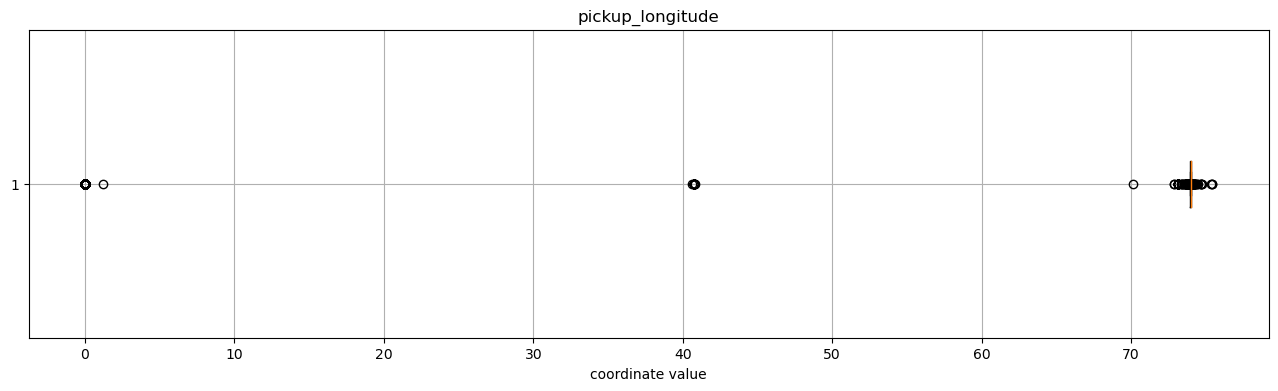

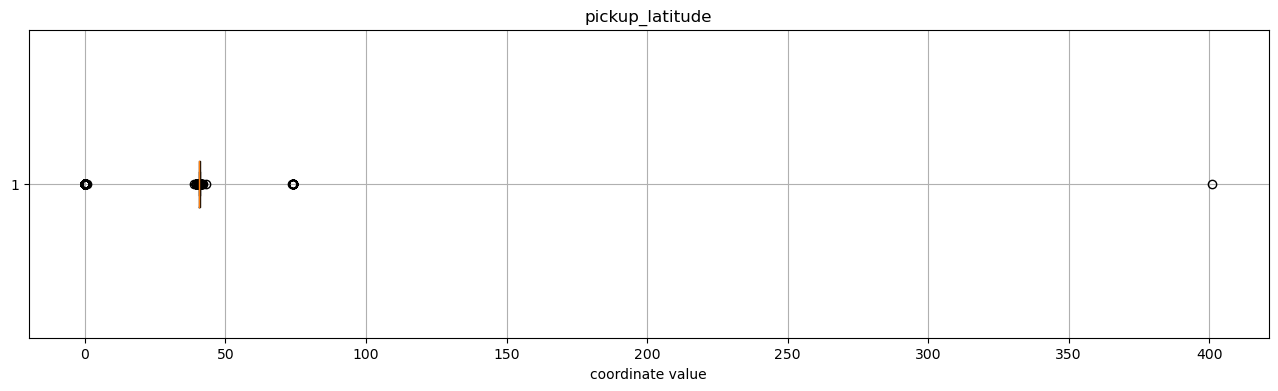

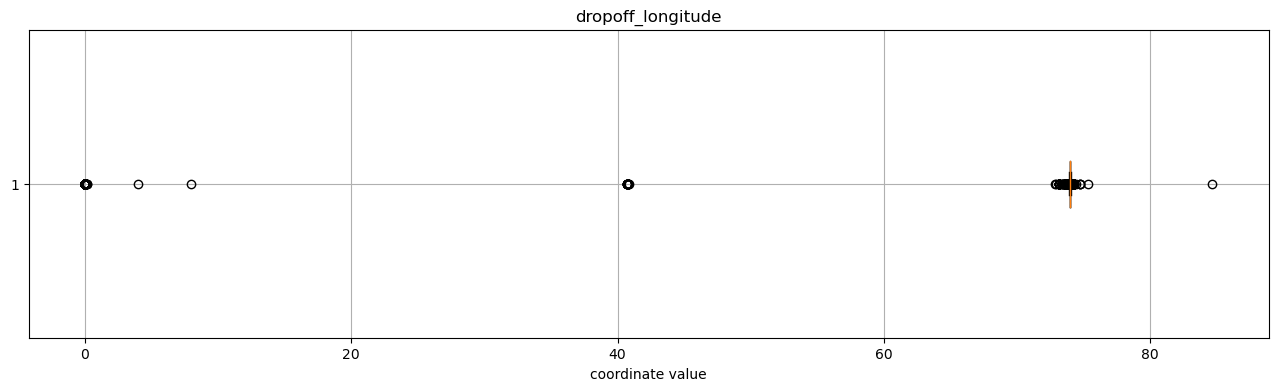

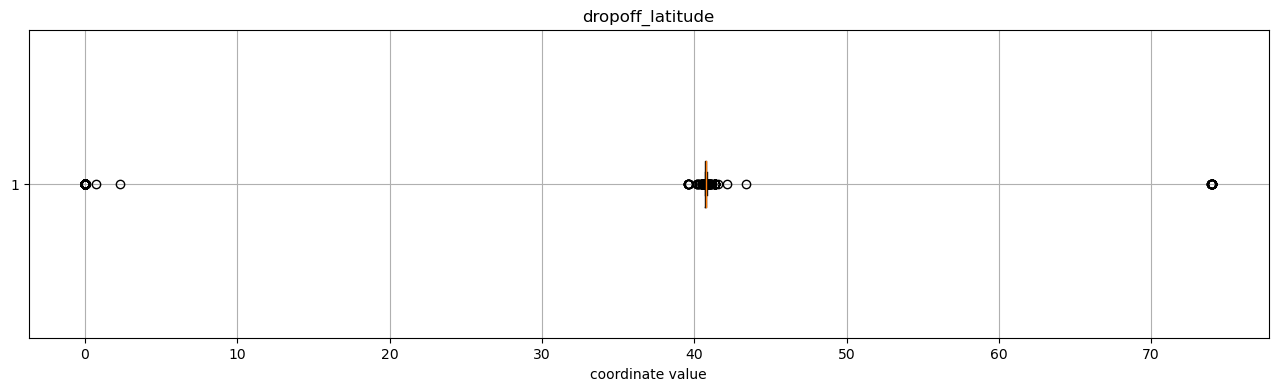

In [7]:
coords = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for name in coords:
    df[name] = abs(df[name])
    plt.figure(figsize=(16,4))
    plt.title(name)
    plt.boxplot(df[name], vert=False)
    plt.xlabel('coordinate value')
    plt.grid(True)
    plt.show()

<hr style = "color:#EE7600">

<p style = "font-size:18px"> The diagrams confirm the presence of outliers in the data <p>

<hr style = "color:#EE7600">

In [8]:
df = df.loc[((df['pickup_longitude']>=73) & (df['pickup_longitude']<80)) &
            ((df['dropoff_longitude']>=73)&(df['dropoff_longitude']<80)) &
            ((df['dropoff_latitude']>=40) & (df['dropoff_latitude']<=45)) &
            ((df['pickup_latitude']>=40)&(df['pickup_latitude']<=45))]

* <p style="font-size:20px">passenger_count<p>


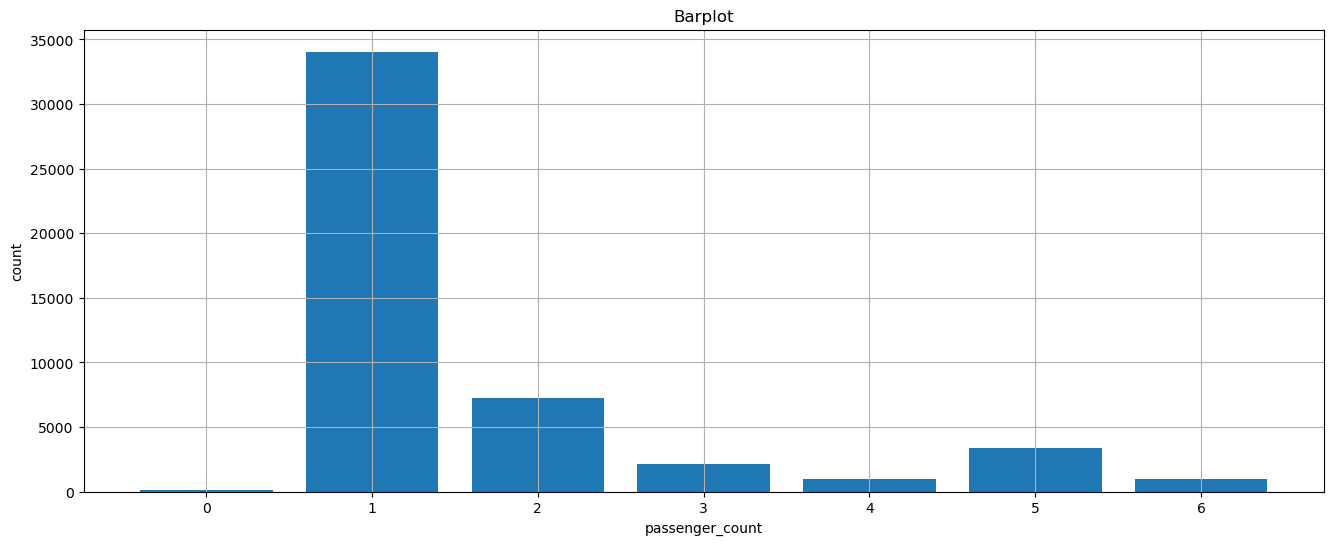

In [9]:
group_pass = df['passenger_count'].value_counts()
plt.figure(figsize=(16,6))
plt.title('Barplot')
plt.bar(group_pass.index, height=group_pass.values)
plt.xlabel('passenger_count')
plt.ylabel('count')
plt.xticks(group_pass.index)
plt.grid(True)
plt.show()

<hr style = "color:#EE7600">

<p style = "font-size:18px"> The number of taxi passengers equal to 0 probably means delivery. In this case, the feature has no outlier <p>

<hr style = "color:#EE7600">

* <p style="font-size:20px">pickup_datetime<p>


<p style = "font-size:18px"> Create new features: <p>

In [10]:
df['year']=pd.DatetimeIndex(df['pickup_datetime']).year
df['month']=pd.DatetimeIndex(df['pickup_datetime']).month
df['day']=pd.DatetimeIndex(df['pickup_datetime']).day
df['hour']=pd.DatetimeIndex(df['pickup_datetime']).hour
df['minute']=pd.DatetimeIndex(df['pickup_datetime']).minute
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,73.844311,40.721319,73.841610,40.712278,1,2009,6,15,17,26
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,74.016048,40.711303,73.979268,40.782004,1,2010,1,5,16,52
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,73.982738,40.761270,73.991242,40.750562,2,2011,8,18,0,35
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,73.987130,40.733143,73.991567,40.758092,1,2012,4,21,4,30
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,73.968095,40.768008,73.956655,40.783762,1,2010,3,9,7,51


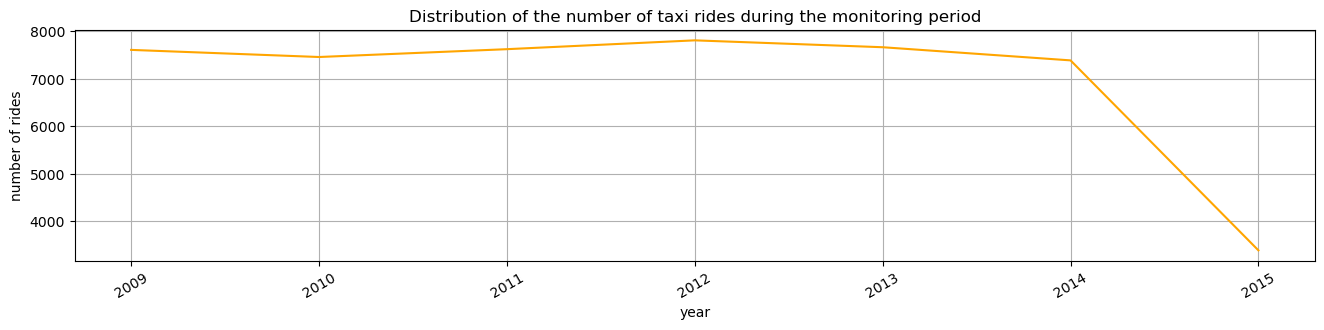

In [11]:
df = df.drop('pickup_datetime',axis=1)
group_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(16,3))
plt.title('Distribution of the number of taxi rides during the monitoring period')
plt.plot(group_year.index, group_year.values, color='orange')
plt.xlabel('year')
plt.ylabel('number of rides')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

<hr style = "color:#EE7600">

<p style = "font-size:18px"> The number of taxi rides does not change much from year to year  <p>

<hr style = "color:#EE7600">

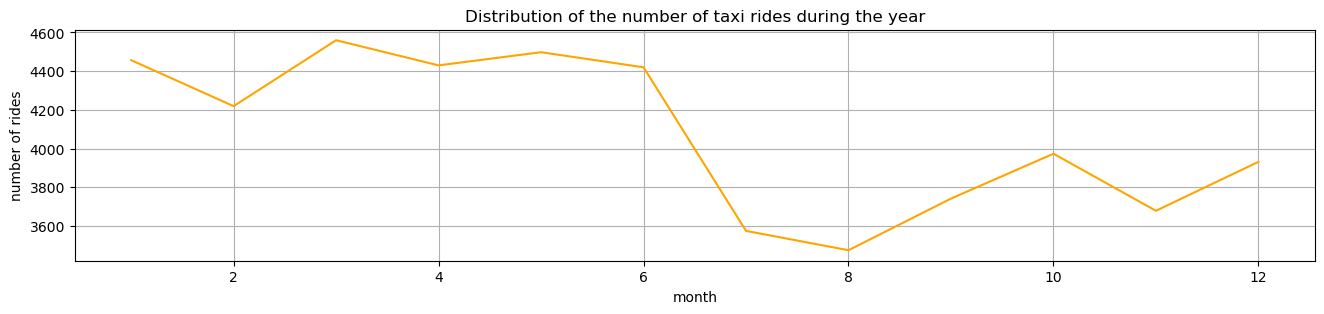

In [12]:
group_month = df['month'].value_counts().sort_index()
plt.figure(figsize=(16,3))
plt.title('Distribution of the number of taxi rides during the year')
plt.plot(group_month.index, group_month.values, color='orange')
plt.xlabel('month')
plt.ylabel('number of rides')
plt.grid(True)
plt.show()

<hr style = "color:#EE7600">

<p style = "font-size:18px">By July, the number of trips decreases significantly, then increases slightly after August, and the peak is observed in March <p>

<hr style = "color:#EE7600">

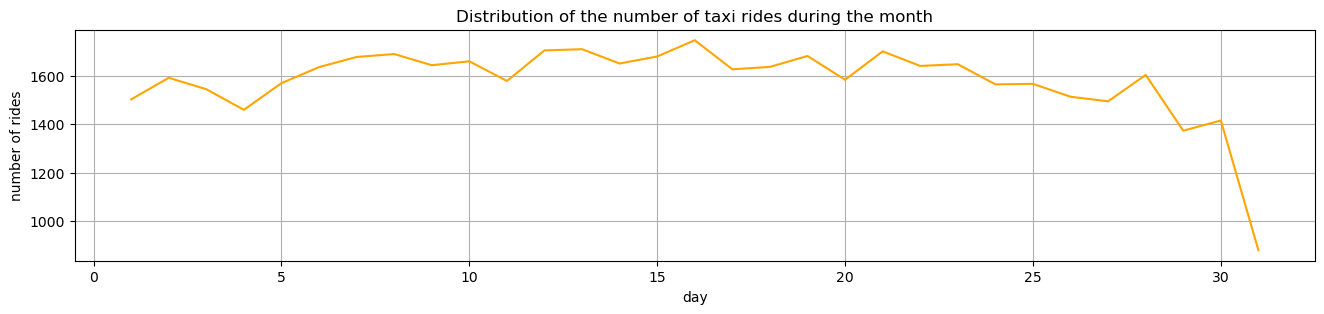

In [13]:
group_day = df['day'].value_counts().sort_index()
plt.figure(figsize=(16,3))
plt.title('Distribution of the number of taxi rides during the month')
plt.plot(group_day.index, group_day.values, color='orange')
plt.xlabel('day')
plt.ylabel('number of rides')
plt.grid(True)
plt.show()

<hr style = "color:#EE7600">

<p style = "font-size:18px">During the month, the number of trips is almost the same every day, at the beginning and end of the month a little less <p>

<hr style = "color:#EE7600">

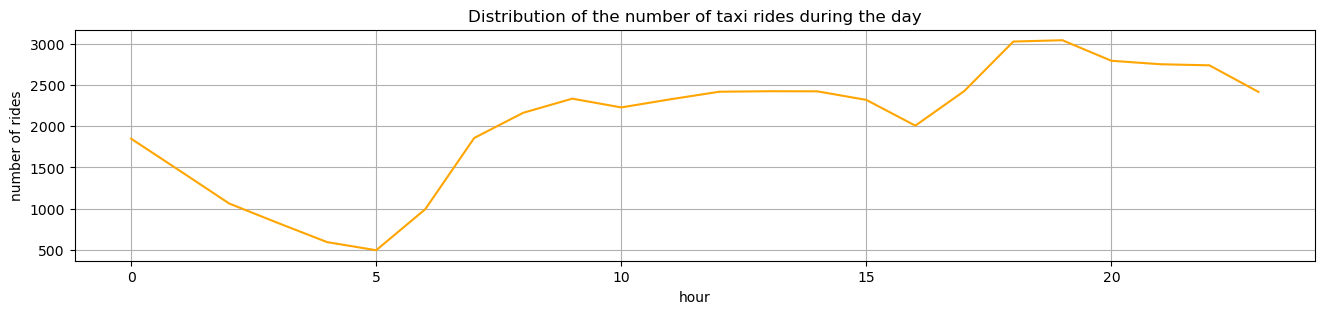

In [14]:
group_hour = df['hour'].value_counts().sort_index()
plt.figure(figsize=(16,3))
plt.title('Distribution of the number of taxi rides during the day')
plt.plot(group_hour.index, group_hour.values, color='orange')
plt.xlabel('hour')
plt.ylabel('number of rides')
plt.grid(True)
plt.show()

<hr style = "color:#EE7600">

<p style = "font-size:18px">  By evening, people are starting to order a taxi more often<p>

<hr style = "color:#EE7600">

* <p style="font-size:20px">key<p>

<hr style = "color:#EE7600">

<p style = "font-size:18px">  The feature does not carry useful information<p>

<hr style = "color:#EE7600">

In [15]:
df = df.drop('key',axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,4.5,73.844311,40.721319,73.841610,40.712278,1,2009,6,15,17,26
1,16.9,74.016048,40.711303,73.979268,40.782004,1,2010,1,5,16,52
2,5.7,73.982738,40.761270,73.991242,40.750562,2,2011,8,18,0,35
3,7.7,73.987130,40.733143,73.991567,40.758092,1,2012,4,21,4,30
4,5.3,73.968095,40.768008,73.956655,40.783762,1,2010,3,9,7,51


### <h3 style="font-size:25px;color:#EE3B3B;"> Target fare_amount <h3>

In [16]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,4.5,73.844311,40.721319,73.841610,40.712278,1,2009,6,15,17,26
1,16.9,74.016048,40.711303,73.979268,40.782004,1,2010,1,5,16,52
2,5.7,73.982738,40.761270,73.991242,40.750562,2,2011,8,18,0,35
3,7.7,73.987130,40.733143,73.991567,40.758092,1,2012,4,21,4,30
4,5.3,73.968095,40.768008,73.956655,40.783762,1,2010,3,9,7,51


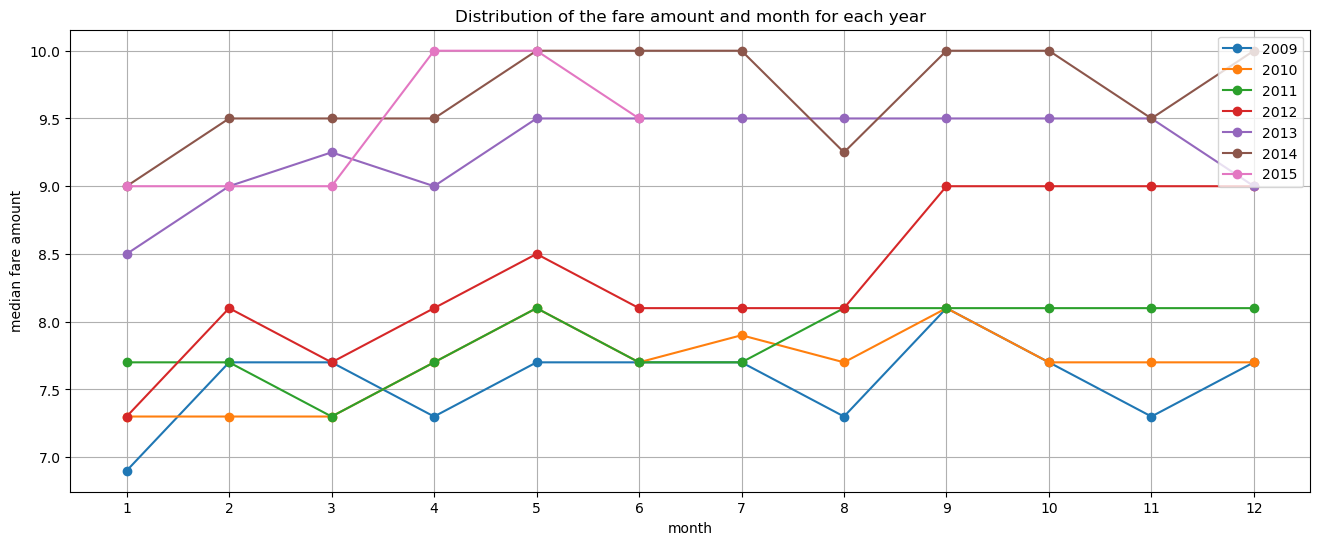

In [17]:
fa_pivot = pd.pivot_table(df, index='year', columns=['month'], values='fare_amount', aggfunc='median')
plt.figure(figsize=(16,6))
plt.title('Distribution of the fare amount and month for each year')
for i in range(0,7):
    plt.plot(fa_pivot.columns, fa_pivot.values[i], label=fa_pivot.index[i], marker='o')
    plt.legend(loc ='upper right')
plt.xlabel('month')
plt.ylabel('median fare amount')
plt.grid(True)
plt.xticks(fa_pivot.columns)
plt.show()

<hr style = "color:#EE7600">

<p style = "font-size:18px"> The cost of the tariff has increased during the observation period. The growth was especially noticeable from 2011 to 2013. Almost every year the price rises , but at the beginning of the year it drops slightly <p>

<hr style = "color:#EE7600">

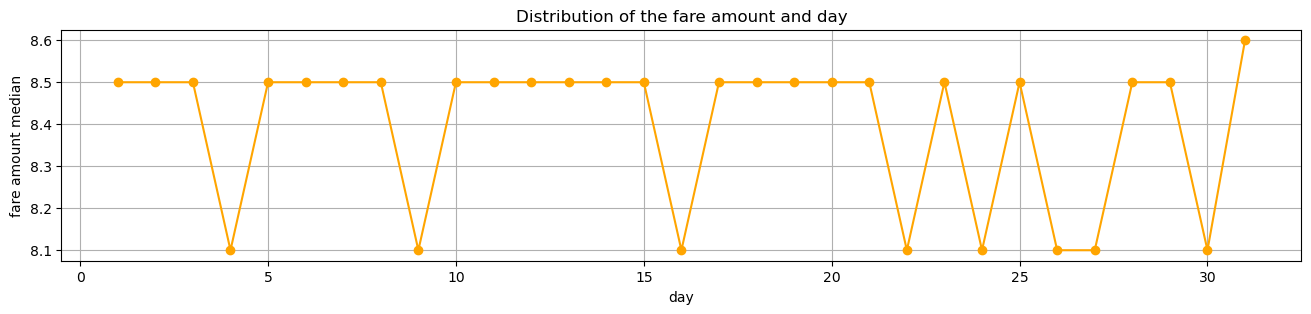

In [18]:
group_day_fa = df.groupby('day')['fare_amount'].median()

plt.figure(figsize=(16,3))
plt.title('Distribution of the fare amount and day')
plt.plot(group_day_fa.index, group_day_fa.values, color='orange',marker='o')
plt.xlabel('day')
plt.ylabel('fare amount median')
plt.grid(True)
plt.show()


<hr style = "color:#EE7600">

<p style = "font-size:18px"> By the end of the month, the tariff often changes <p>

<hr style = "color:#EE7600">

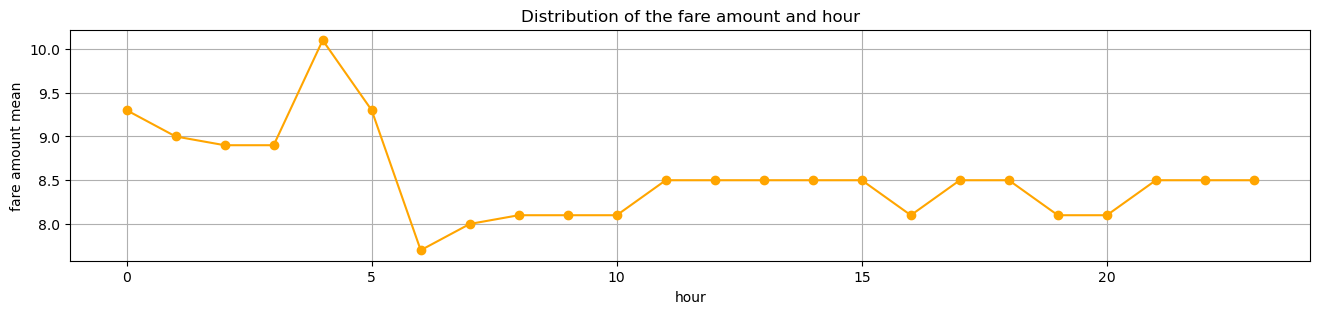

In [19]:
group_hour_fa = df.groupby('hour')['fare_amount'].median()

plt.figure(figsize=(16,3))
plt.title('Distribution of the fare amount and hour')
plt.plot(group_hour_fa.index, group_hour_fa.values, color='orange',marker='o')
plt.xlabel('hour')
plt.ylabel('fare amount mean')
plt.grid(True)
plt.show()

<hr style = "color:#EE7600">

<p style = "font-size:18px"> The price of a trip rises sharply at 5 in the morning and decreases closer to 6-7 hours <p>

<hr style = "color:#EE7600">

<h2 style="font-size:35px;color:#EE3B3B;">Features engineering <h2>

<hr style = "color:#EE7600">

<p style = "font-size:18px"> Knowing the coordinates of boarding and disembarkation, you can calculate the distance, albeit roughly, without taking into account roads, but such a sign can help to more clearly consider the relationship between the price of the trip and the distance. 
Let's use the haversines formula to calculate the spherical distance. This formula is also correct for short distances. <p>

<img src="https://avatars.mds.yandex.net/i?id=a3aa66ba768b55092655014ef0b5e97e-5446295-images-thumbs&n=13" alt="Образец изображения" width="700" height ="300">

<p style = "font-size:18px"> To convert the angular distance to metric, you need to multiply the angular difference by the radius of the Earth (6372795 meters), the units of the final distance will be equal to the units in which the radius is expressed.
<p>

<hr style = "color:#EE7600">

In [20]:
def calc_distance(pu_la,do_la,pu_lo,do_lo):
    pu_la = pu_la*math.pi/180
    do_la = do_la*math.pi/180
    pu_lo = pu_lo*math.pi/180
    do_lo = do_lo*math.pi/180
    delta_sigm = math.sqrt((math.sin((do_lo-pu_lo)/2))**2+(math.cos(pu_lo)*math.cos(do_lo)*(math.sin((do_la-pu_la)/2))**2))
    distance = delta_sigm*6372.795
    return distance

df['distance[km]'] = df.apply(lambda x: calc_distance(x['pickup_latitude'], x['dropoff_latitude'],x['pickup_longitude'],x['dropoff_longitude']),axis=1)
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,distance[km]
count,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000,48955.000000
mean,11.358108,73.975231,40.751173,73.974024,40.751634,1.669288,2011.739148,6.274007,15.663814,13.484179,29.652027,1.369644
std,9.653193,0.040491,0.032610,0.038960,0.035675,1.290201,1.865459,3.461850,8.659920,6.502953,17.308205,2.071177
min,-5.000000,73.137393,40.121653,73.137393,40.164927,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,73.968397,40.736520,73.965320,40.735899,1.000000,2010.000000,3.000000,8.000000,9.000000,15.000000,0.425547
50%,8.500000,73.982122,40.753446,73.980480,40.754120,1.000000,2012.000000,6.000000,16.000000,14.000000,30.000000,0.780666
75%,12.500000,73.992301,40.767767,73.991334,40.768486,2.000000,2013.000000,9.000000,23.000000,19.000000,45.000000,1.429686
max,200.000000,75.423848,43.098708,75.354559,43.415190,6.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,80.702317


In [21]:
len(df.loc[df['distance[km]']==0]
)

535

<hr style = "color:#EE7600">

<p style = "font-size:18px"> There are trips with the same boarding and disembarkation coordinates in the data, perhaps the trip did not take place or there are some other reasons, but such data is not useful for research
 <p>

<hr style = "color:#EE7600">

In [22]:
df = df.loc[df['distance[km]']!=0]

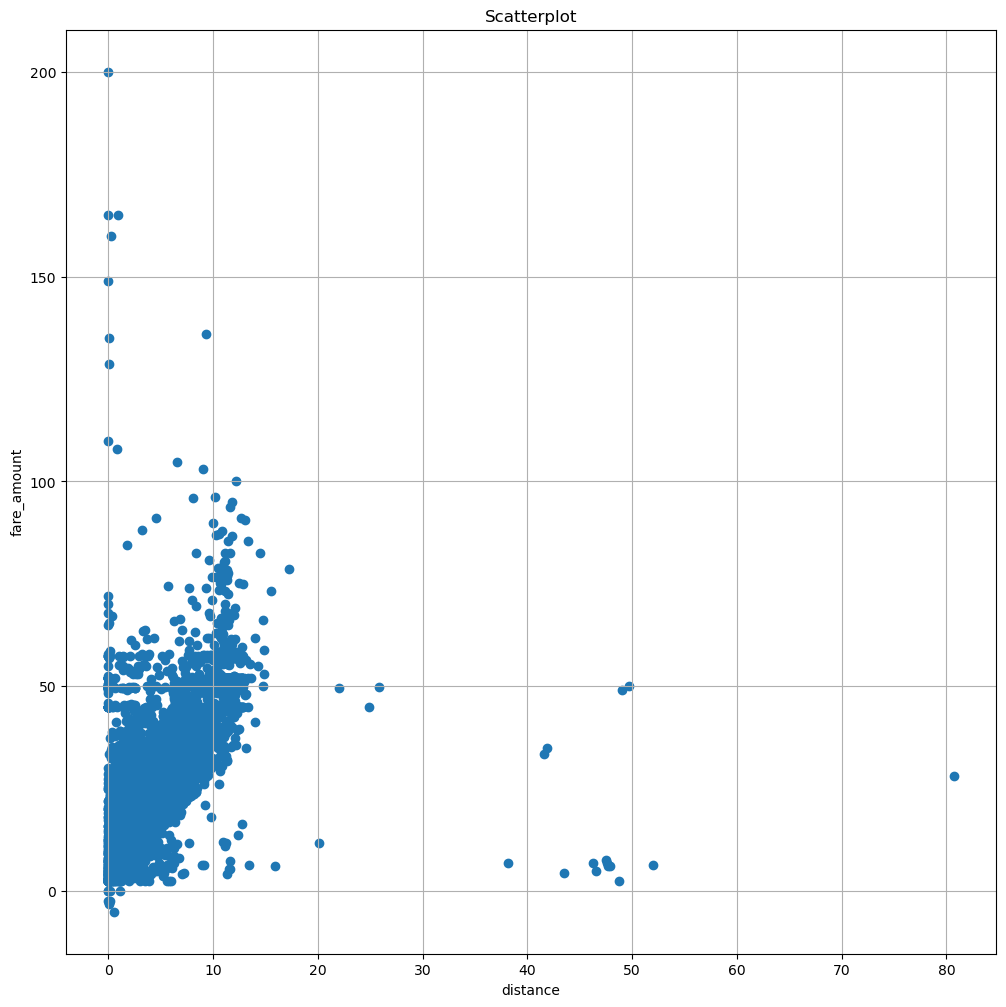

In [23]:
plt.figure(figsize=(12,12))
plt.title('Scatterplot')
plt.scatter(df['distance[km]'], df['fare_amount'])
plt.xlabel('distance')
plt.ylabel('fare_amount')
plt.grid(True)
plt.show()

<hr style = "color:#EE7600">

<p style = "font-size:18px"> The fare for the bulk of trips increases with increasing distance. It would be useful to get information about traffic jams or average travel speed, weather, taxi class, as well as the real, rather than the shortest distance between points <p>

<hr style = "color:#EE7600">

### <h3 style="font-size:25px;color:#EE3B3B;"> The relationship between the signs <h3>

interval columns not set, guessing: ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year', 'month', 'day', 'hour', 'minute', 'distance[km]']


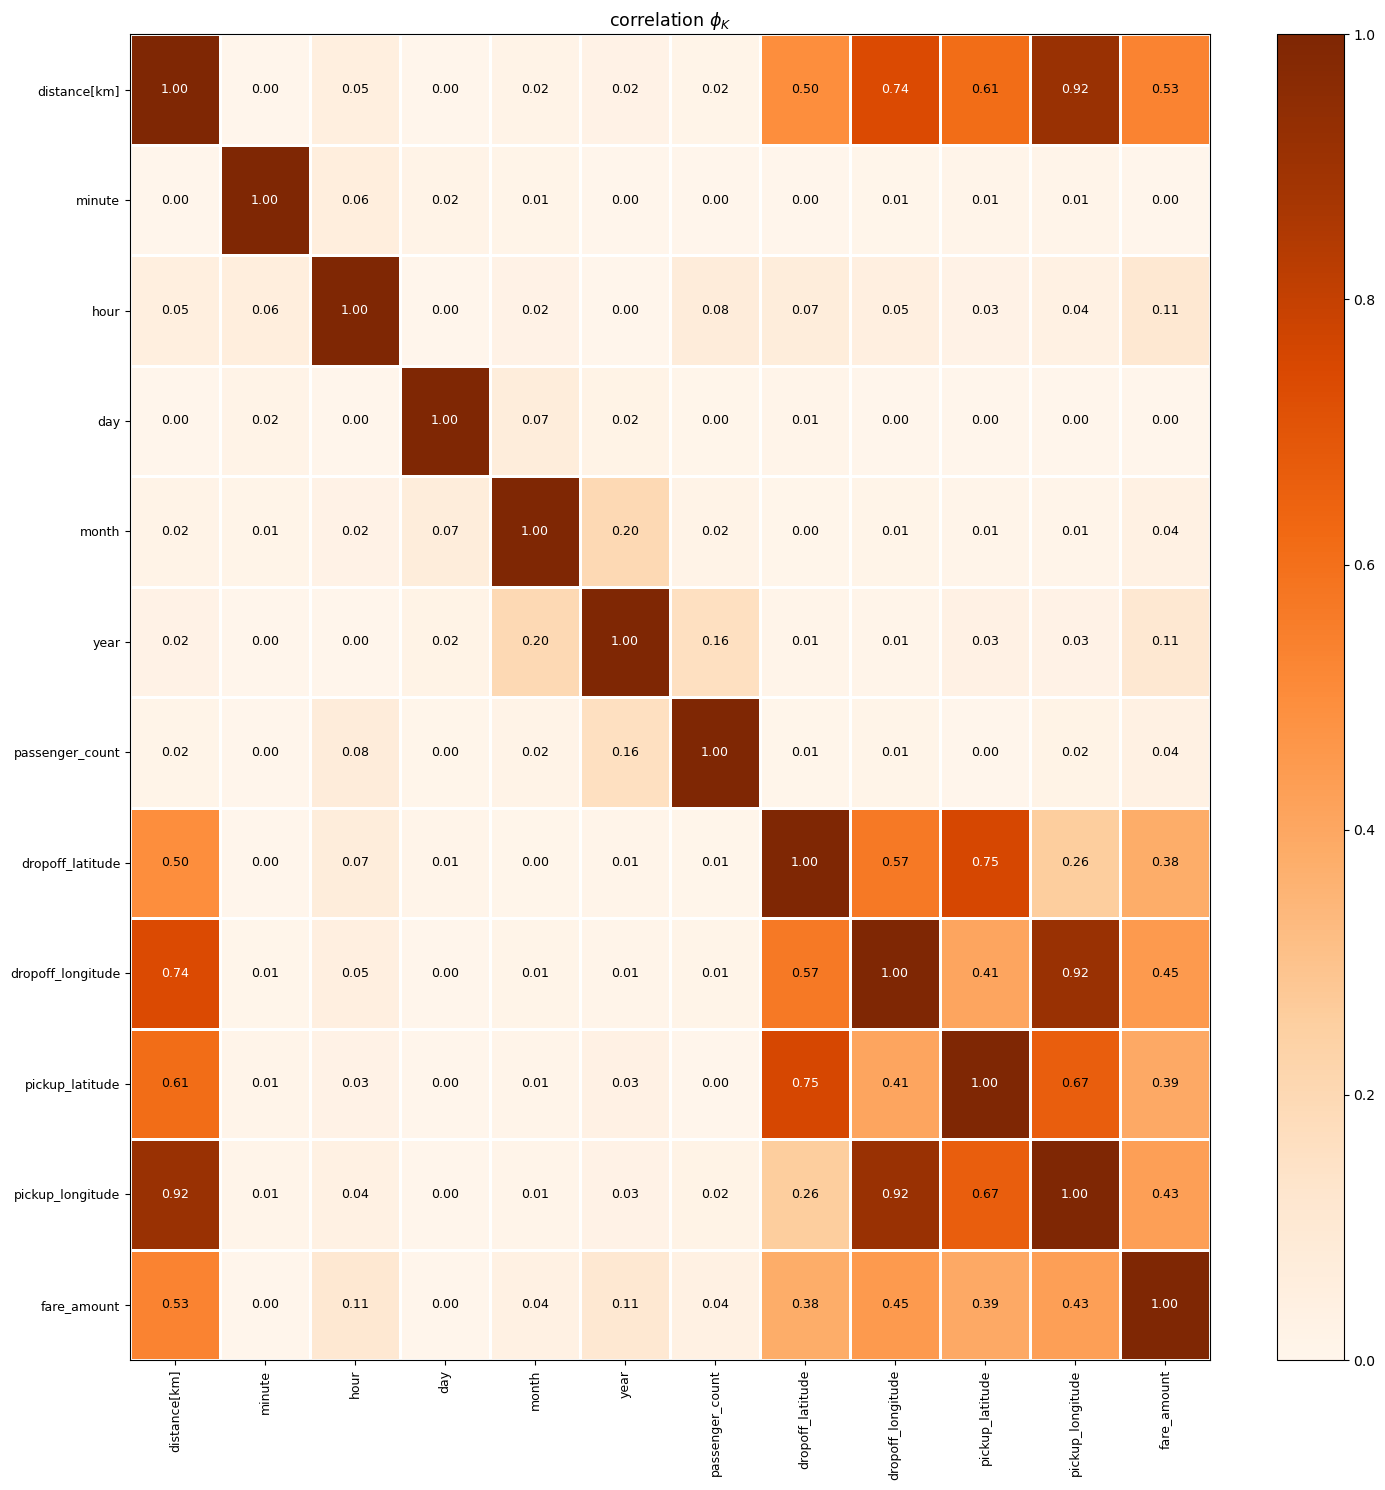

In [24]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Oranges", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(15, 15))
plt.tight_layout()

<hr style = "color:#EE7600">

<p style = "font-size:18px"> The target correlates well with coordinates and distance<p>

<hr style = "color:#EE7600">

<h2 style="font-size:35px;color:#EE3B3B;">Model Building<h2>

### <h3 style="font-size:25px;color:#EE3B3B;">Data train test split<h3>

In [25]:
features = df.drop('fare_amount',axis=1)
target = df['fare_amount']
print(features.shape)
target.shape

(48420, 11)


(48420,)

In [26]:
features = pd.get_dummies(features,drop_first=True)

In [27]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

<hr style = "color:#EE7600">

<p style = "font-size:18px"> To evaluate the metrics of various models, we will train the simplest model <p>

<hr style = "color:#EE7600">

In [28]:
mean_target = target_train.mean()
lst_mean_target = [mean_target] * len(target_test)
mse_mean = round(mean_squared_error(target_test, lst_mean_target),3)
print('MSE (simple model):',mse_mean)

MSE (simple model): 84.891


### <h3 style="font-size:25px;color:#EE3B3B;"> DecisionTreeRegressor<h3>

In [29]:
model = DecisionTreeRegressor(random_state=7)
params = {
    'max_depth':range(1,11,1)
}
grid = GridSearchCV(model, params, cv = 5, scoring='neg_mean_squared_error')
grid.fit(features_train, target_train)

print('MSE (DecisionTreeRegressor):',mean_squared_error(grid.predict(features_test),target_test))
print('Parametersof model:', grid.best_params_)

MSE (DecisionTreeRegressor): 20.065353956195885
Parametersof model: {'max_depth': 8}


### <h3 style="font-size:25px;color:#EE3B3B;"> RandomForestRegressor<h3>

In [30]:
model = RandomForestRegressor()
model.fit(features_train, target_train)
print('MSE (RandomForestRegressor):',mean_squared_error(model.predict(features_test),target_test))

MSE (RandomForestRegressor): 13.602490432821147


### <h3 style="font-size:25px;color:#EE3B3B;"> GradientBoostingRegressor<h3>

In [31]:
model = GradientBoostingRegressor(n_estimators=200,
          max_depth= 5,
          learning_rate= 0.2,random_state=47)
model.fit(features_train, target_train)
print('MSE (GradientBoostingRegressor):',mean_squared_error(model.predict(features_test),target_test))

MSE (GradientBoostingRegressor): 13.253928548053922


### <h3 style="font-size:25px;color:#EE3B3B;"> LinearRegression<h3>

In [32]:
model = LinearRegression()
model.fit(features_train, target_train)
print('MSE (LinearRegression):',mean_squared_error(model.predict(features_test),target_test))

MSE (LinearRegression): 28.079967199937848


<h2 style="font-size:35px;color:#EE3B3B;">Conclusion<h2>

<p style = 'font-size:20px'> A research was conducted to determine fare amount. The following steps were completed during the EDA: <p>

- <p style = 'font-size:20px'> research of dataset, content and data types <p>
- <p style = 'font-size:20px'> checking emptinesses <p>
- <p style = 'font-size:20px'> checking for duplicates <p>
- <p style = 'font-size:20px'> checking data for outliers, data distribution <p>
- <p style = 'font-size:20px'> the study of dependencies between features <p>

<p style = 'font-size:20px'> New features have been added and unnecessary ones have been removed <p>
<p style = 'font-size:20px'> Several models were trained: <p>

- <p style = 'font-size:20px'> Simplest model: MSE = 84.8 <p>
- <p style = 'font-size:20px'> DecisionTreeRegressor: MSE = 20.1 <p>
- <p style = 'font-size:20px'> RandomForestRegressor: MSE = 13.6 <p>
- <p style = 'font-size:20px'> GradientBoostingRegressor: MSE = 13.3 <p>
- <p style = 'font-size:20px'> LinearRegression: MSE = 28.1 <p>

<p style = "font-size:20px"> The MSE metric of all trained models is lower than that of the simplest model. The gradient boosting model showed itself best with the following parameters: n_estimators=200, max_depth= 5, learning_rate= 0.2,random_state=47. The MSE of such a model is - 13.3 <p>